## Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv')
data.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [3]:
df = data.copy(deep=True)
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


## 1. Defining Problem Statement

### The objective is to leverage the Scaler database and employ data science techniques to cluster a segment of learners based on their job profiles, associated companies, and other relevant features. The purpose of this clustering exercise is to identify patterns and similarities among learners, grouping them into clusters that exhibit similar characteristics. By achieving this, the analytics vertical aims to provide valuable insights into the types of companies and job positions that align with the skills and preferences of Scaler learners. The ultimate goal is to enhance the understanding of the learner base, enabling Scaler to tailor its offerings and support services more effectively to cater to the diverse career aspirations and professional trajectories of its audience.

## 1.1 Performing Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [5]:
# Shape of the data
df.shape

(205843, 7)

In [6]:
df.dtypes

Unnamed: 0            int64
company_hash         object
email_hash           object
orgyear             float64
ctc                   int64
job_position         object
ctc_updated_year    float64
dtype: object

In [7]:
df = df.drop(columns='Unnamed: 0')
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [8]:
# After conversion to datetime

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153281 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [9]:
# Statistical Summary

df.describe()

,orgyear,ctc,ctc_updated_year
count,205757.000000,2.058430e+05,205843.000000
mean,2014.882750,2.271685e+06,2019.628231
std,63.571115,1.180091e+07,1.325104
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


In [10]:
# Statistical Summary including objects dtypes

df.describe(include='object').T

,count,unique,top,freq
company_hash,205799,37299,nvnv wgzohrnvzwj otqcxwto,8337
email_hash,205843,153443,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,10
job_position,153281,1017,Backend Engineer,43554


In [11]:
df['job_position'].value_counts()

Backend Engineer                  43554
FullStack Engineer                24717
Other                             18071
Frontend Engineer                 10417
Engineering Leadership             6870
                                  ...  
ayS                                   1
Principal Product Engineer            1
Senior Director of Engineering        1
Seller Support Associate              1
Android Application developer         1
Name: job_position, Length: 1017, dtype: int64

In [12]:
df['company_hash'].value_counts()

nvnv wgzohrnvzwj otqcxwto         8337
xzegojo                           5381
vbvkgz                            3481
zgn vuurxwvmrt vwwghzn            3411
wgszxkvzn                         3240
                                  ... 
onvqmhwpo                            1
bvsxw ogenfvqt uqxcvnt rxbxnta       1
agsbv ojontbo                        1
vnnhzt xzegwgb                       1
bvptbjnqxu td vbvkgz                 1
Name: company_hash, Length: 37299, dtype: int64

In [13]:
# checking for duplicated values
df[df.duplicated()]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
97138,wtqtzwt xzw,bb8e4b09544daf1bfc8c7bb9a9ae1fee35490cf3f321b8...,2014.0,1000000,FullStack Engineer,2019.0
98085,2020,6ad3e6ab27462c2c7428fa5d51405933335341d4d969b5...,2020.0,720000,NaN,2019.0
102600,voxvz uvxzno,c7fac937a34f7ae432ff1d77466eb7ea6cf25dfd5ebcca...,2020.0,1280000,NaN,2019.0
109324,wgbwvon mhoxztoo,0442a51ef5080d7d40721c007131a1d5bdeabae2c1b153...,2016.0,700000,NaN,2019.0
111354,uyxrxuo xzzgcvnxgz wvbuho,704d69965035d1c341b06fc5d83bf1b714f1625c0cf271...,2017.0,850000,iOS Engineer,2019.0
111521,aqggb ntwyzgrgsj,df81dac132d66a42a0c71a4799e1040731738e542c81ff...,2017.0,1270000,FullStack Engineer,2019.0
115241,rgfto wgbuvzxto xzw,ea363e930dabe0fbb63438e07775af3cb3b32639947c47...,2017.0,1100000,Backend Engineer,2019.0
117246,xatbxv,f451ceee50b1bfa3dc749c6aa8634ab3851a4ab961b003...,2019.0,640000,NaN,2019.0
117549,exzdtqv,e7df851527dd6f8ec95d5e13d9fb2a7255380245b808e3...,2020.0,1500000,NaN,2020.0
120371,avnvbtnxwv ogrhnxgzo uqxcvnt rxbxnta,15d7dd6801fb7cb980e77c420dd9bef5773e7ef57f510c...,2016.0,1300000,Backend Engineer,2020.0


In [14]:
df=df.drop_duplicates(keep='first')
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


In [15]:
# Checking percentage of Missing values

100.0*df.isna().sum()/df.shape[0]

company_hash         0.021379
email_hash           0.000000
orgyear              0.041786
ctc                  0.000000
job_position        25.531801
ctc_updated_year     0.000000
dtype: float64

In [16]:
df['orgyear'] = df['orgyear'].replace(np.nan,df['orgyear'].mean())

In [17]:
# Making new features

df['Years_of_Experience'] = (df['ctc_updated_year']-df['orgyear']).round(2)
df['Years_of_Experience']

0          4.0
1          1.0
2          5.0
3          2.0
4          2.0
          ... 
205838    11.0
205839     3.0
205840     0.0
205841     0.0
205842     2.0
Name: Years_of_Experience, Length: 205810, dtype: float64

In [18]:
df['Years_of_Experience']=df['Years_of_Experience'].replace(np.nan,df['Years_of_Experience'].mean())

In [19]:
df['ctc_in_lakhs'] = (df['ctc']/100000).round(2)
df['ctc_in_lakhs']

0         11.0
1          4.5
2         20.0
3          7.0
4         14.0
          ... 
205838     2.2
205839     5.0
205840     7.0
205841    51.0
205842    12.4
Name: ctc_in_lakhs, Length: 205810, dtype: float64

In [20]:
df =df.drop(columns='ctc')
df.head()

,company_hash,email_hash,orgyear,job_position,ctc_updated_year,Years_of_Experience,ctc_in_lakhs
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,Other,2020.0,4.0,11.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,FullStack Engineer,2019.0,1.0,4.5
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,Backend Engineer,2020.0,5.0,20.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,Backend Engineer,2019.0,2.0,7.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,FullStack Engineer,2019.0,2.0,14.0


In [21]:
df.isna().sum()

company_hash              44
email_hash                 0
orgyear                    0
job_position           52547
ctc_updated_year           0
Years_of_Experience        0
ctc_in_lakhs               0
dtype: int64

In [22]:
df = df.drop(columns=['ctc_updated_year','orgyear'])

### Outlier check

In [23]:
numerical_cols = ['Years_of_Experience','ctc_in_lakhs']

In [24]:
for i in numerical_cols:
    q1 = np.percentile(df[i],25)
    q3 = np.percentile(df[i],75)
    iqr = q3-q1
    upper_whisker = q3 + 1.5*(iqr)
    lower_whisker = q1 - 1.5*(iqr)
    outliers = np.sum((df[i]>upper_whisker) | (df[i]<lower_whisker))
    print(f'IQR for columns {i} is ',iqr)
    print(f'upper whisker for column {i} is ',upper_whisker)
    print(f'lower whisker for column {i} is ',lower_whisker)
    print(f'No. of outliers for column {i} are ',outliers)
    print('-'*60)

IQR for columns Years_of_Experience is  4.0
upper whisker for column Years_of_Experience is  12.0
lower whisker for column Years_of_Experience is  -4.0
No. of outliers for column Years_of_Experience are  10766
------------------------------------------------------------
IQR for columns ctc_in_lakhs is  11.7
upper whisker for column ctc_in_lakhs is  34.55
lower whisker for column ctc_in_lakhs is  -12.249999999999996
No. of outliers for column ctc_in_lakhs are  13126
------------------------------------------------------------


In [25]:
# Outlier Treatment

for i in numerical_cols:
    q1 = np.percentile(df[i],25)
    q3 = np.percentile(df[i],75)
    iqr = q3-q1
    upper_whisker = q3 + 1.5*iqr
    lower_whisker = q1 - 1.5*iqr
    
    df[i] = np.where(df[i]>upper_whisker,upper_whisker,df[i])
    df[i] = np.where(df[i]<lower_whisker,lower_whisker,df[i])

In [26]:
df['Years_of_Experience'] = df['Years_of_Experience'].apply(lambda x : 0 if x<0 else x)

## Univariate analysis and Bivariate Analysis

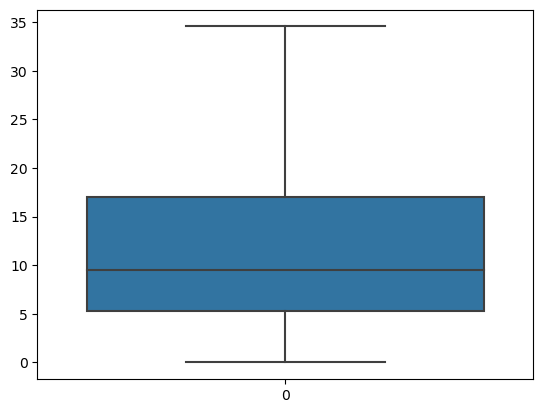

In [27]:
sns.boxplot(df['ctc_in_lakhs'])
plt.show()

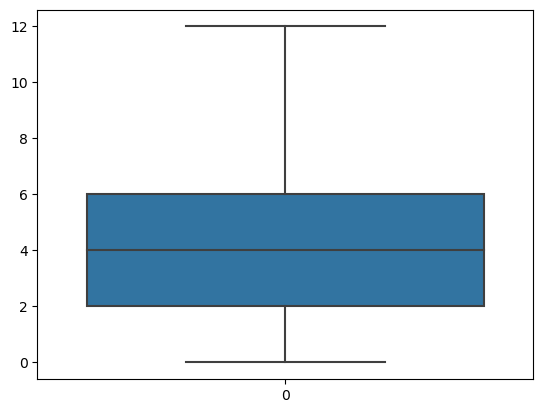

In [28]:
sns.boxplot(df['Years_of_Experience'])
plt.show()

### Successfully handled all the outliers

## Univariate Analysis

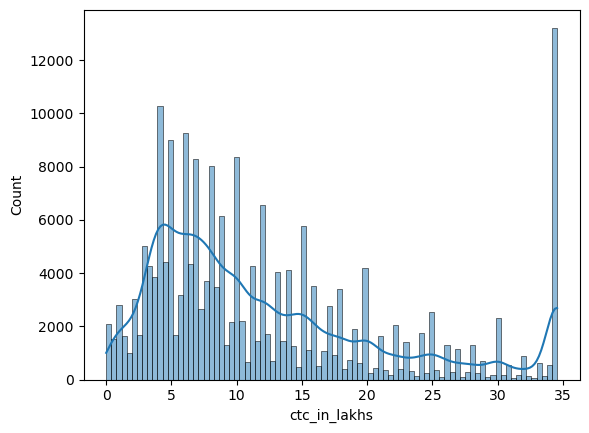

In [29]:
sns.histplot(df['ctc_in_lakhs'],kde=True)
plt.show()

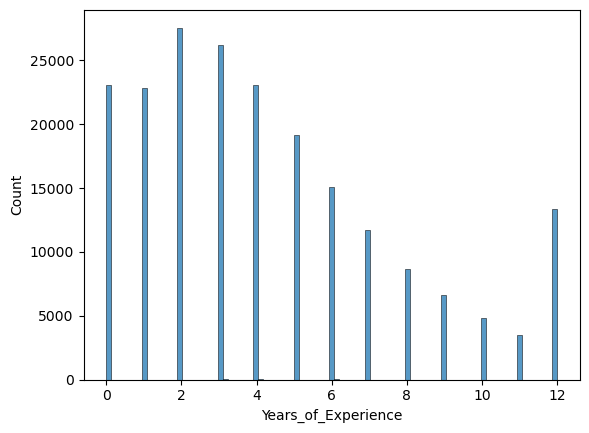

In [30]:
sns.histplot(df['Years_of_Experience'])
plt.show()

In [31]:
d1 = df['job_position'].value_counts()[:20].to_frame()
d1=d1.reset_index()
d1

,index,job_position
0,Backend Engineer,43546
1,FullStack Engineer,24711
2,Other,18071
3,Frontend Engineer,10417
4,Engineering Leadership,6870
5,QA Engineer,6587
6,Data Scientist,5367
7,Android Engineer,5356
8,SDET,4967
9,Devops Engineer,4612


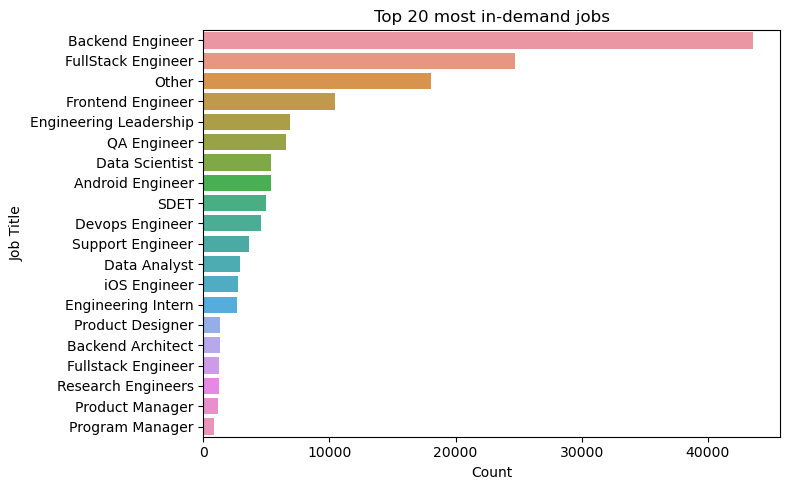

In [32]:
# Top 20 most in demand jobs

plt.figure(figsize=(8,5))
sns.barplot(data=d1,y='index',x='job_position')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 20 most in-demand jobs')
plt.tight_layout()
plt.show()

In [33]:
d2 = df['company_hash'].value_counts()[:20].to_frame()
d2=d2.reset_index()
d2

,index,company_hash
0,nvnv wgzohrnvzwj otqcxwto,8337
1,xzegojo,5381
2,vbvkgz,3481
3,zgn vuurxwvmrt vwwghzn,3411
4,wgszxkvzn,3240
5,vwwtznhqt,2870
6,fxuqg rxbxnta,2653
7,gqvwrt,2504
8,bxwqgogen,2130
9,wvustbxzx,2033


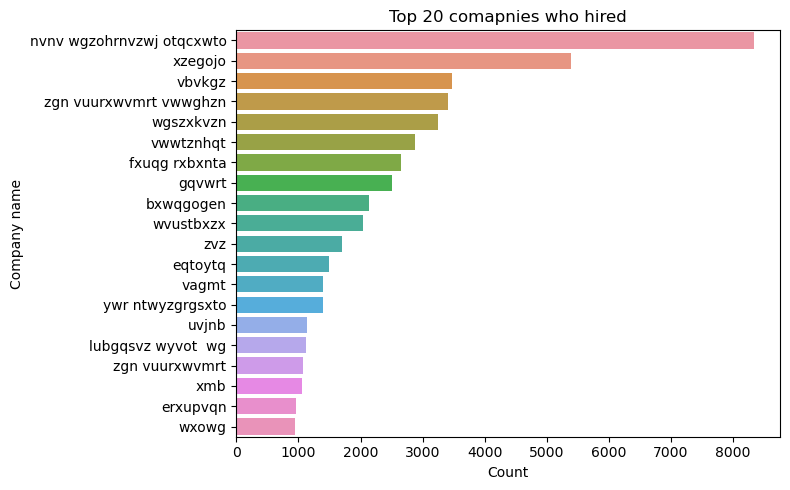

In [34]:
# Top 20 comapnies who hired

plt.figure(figsize=(8,5))
sns.barplot(data=d2,y='index',x='company_hash')
plt.xlabel('Count')
plt.ylabel('Company name')
plt.title('Top 20 comapnies who hired')
plt.tight_layout()
plt.show()

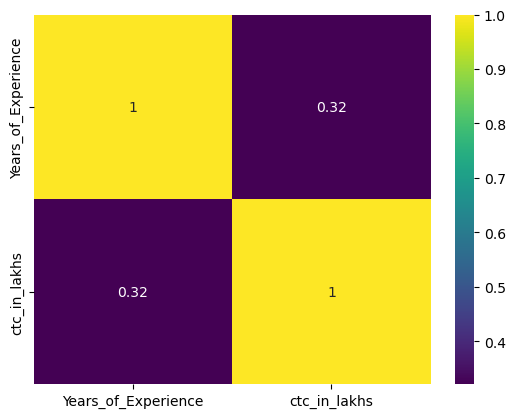

In [35]:
sns.heatmap(df.corr(method='spearman'),annot=True,cmap='viridis')
plt.show()

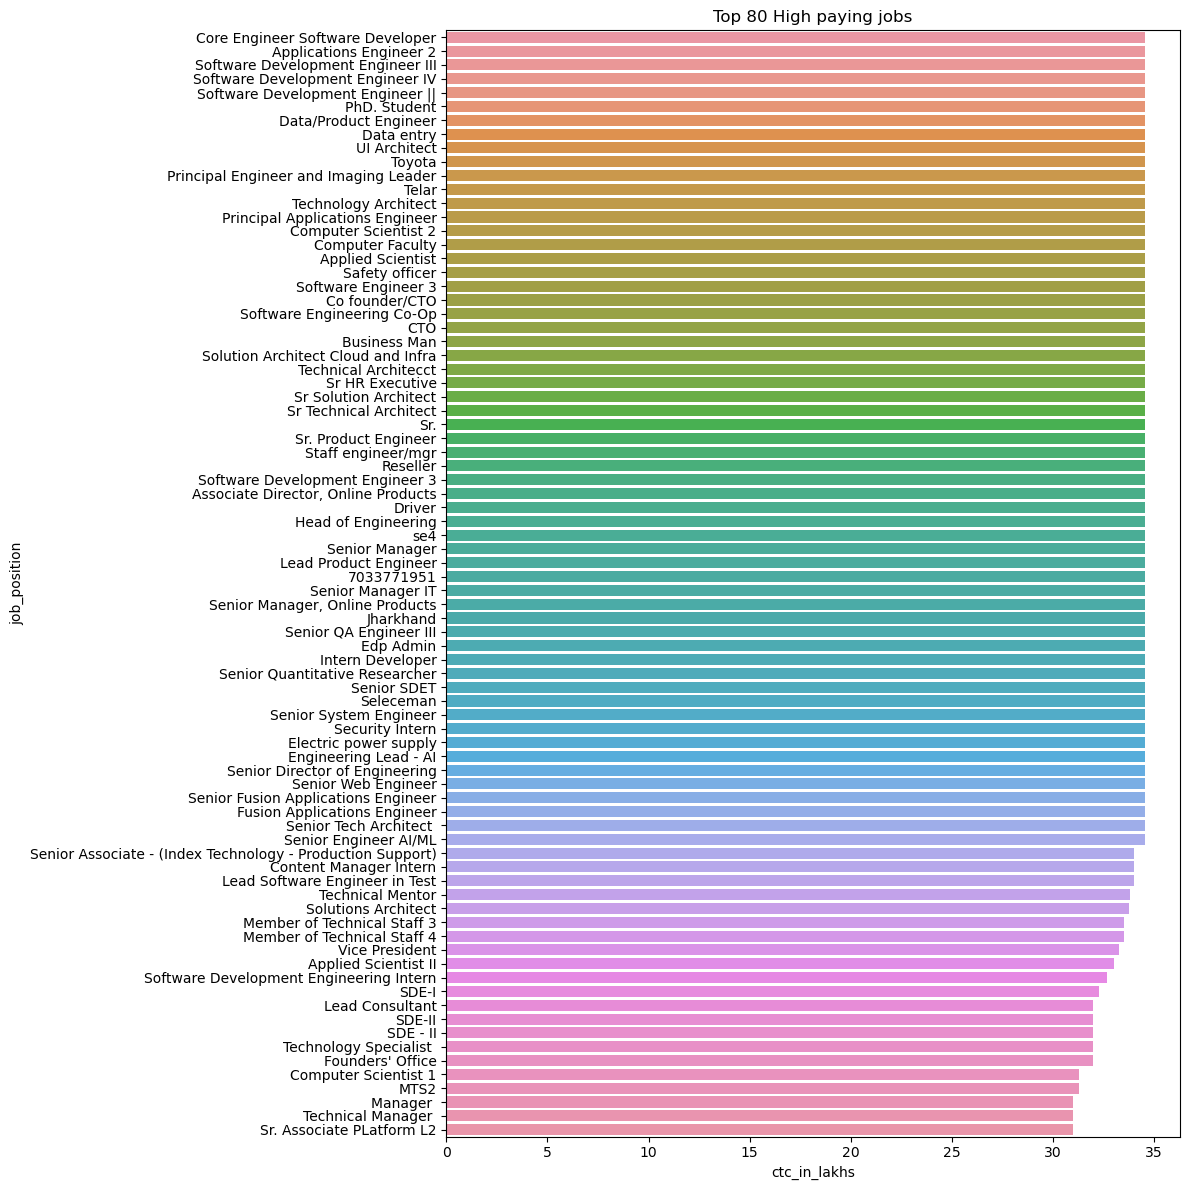

In [36]:
# Top 80 paying jobs as per mean salary

d3 = df.groupby('job_position')['ctc_in_lakhs'].mean().reset_index().sort_values('ctc_in_lakhs',ascending=False).head(80)
plt.figure(figsize=(12,12))
sns.barplot(data=d3,y='job_position',x='ctc_in_lakhs')
plt.title('Top 80 High paying jobs')
plt.tight_layout()
plt.show()

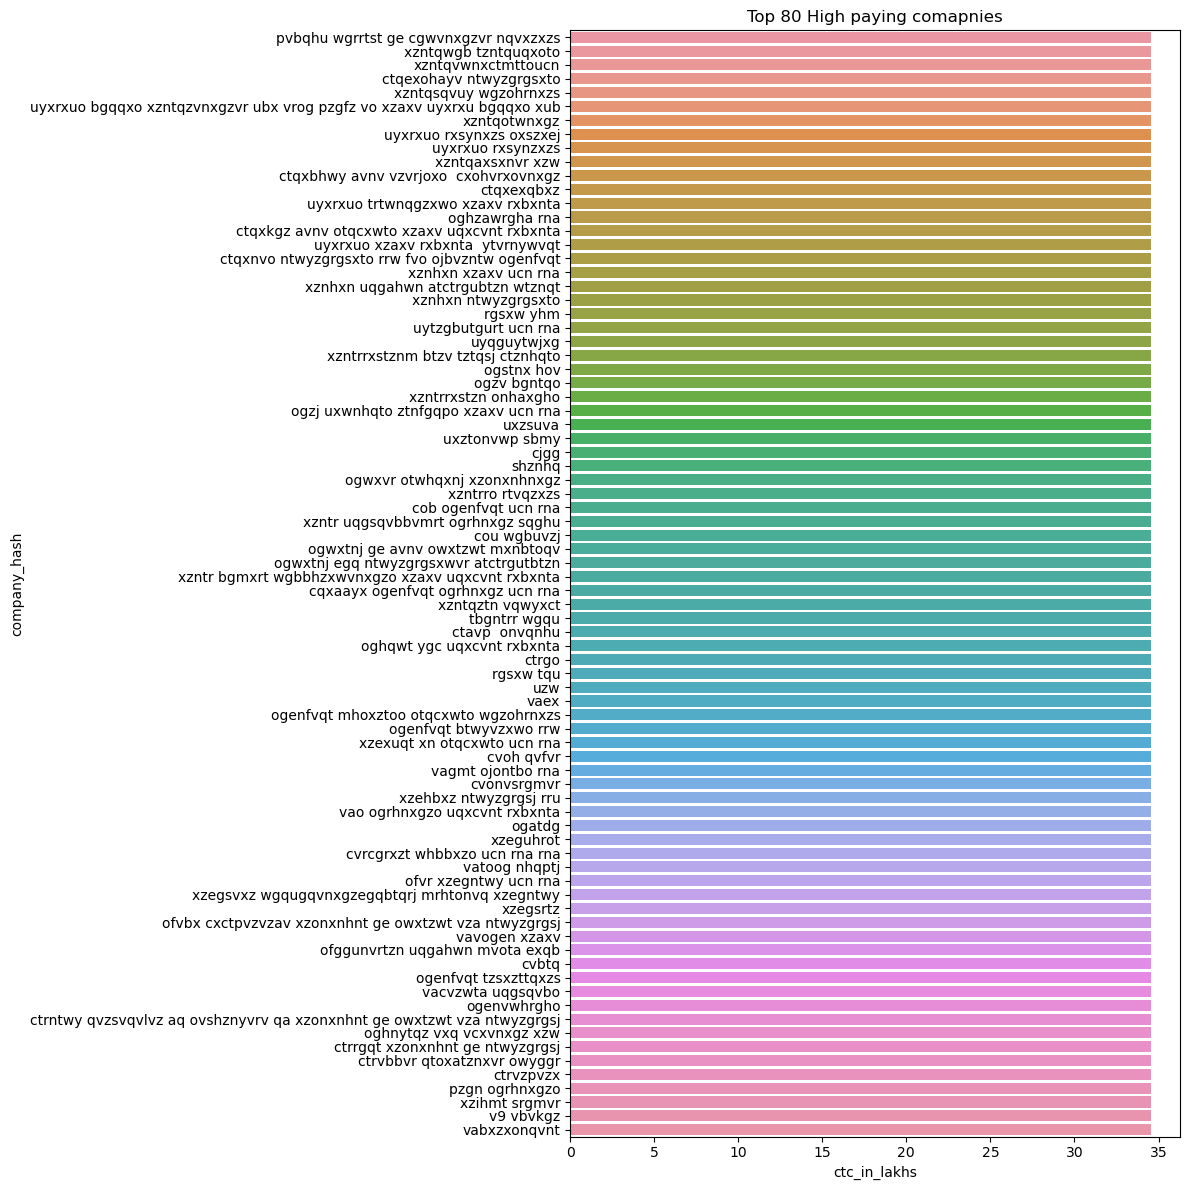

In [37]:
# Top 80 High paying companies

d3 = df.groupby('company_hash')['ctc_in_lakhs'].mean().reset_index().sort_values('ctc_in_lakhs',ascending=False).head(80)
plt.figure(figsize=(12,12))
sns.barplot(data=d3,y='company_hash',x='ctc_in_lakhs')
plt.title('Top 80 High paying comapnies')
plt.tight_layout()
plt.show()

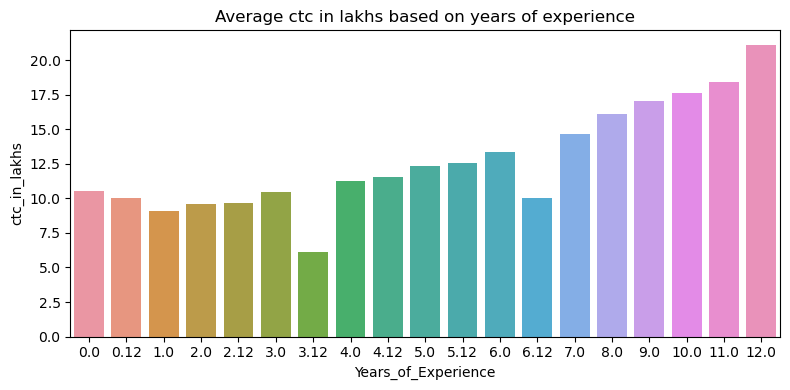

In [38]:
# Average ctc in lakhs based on years of experience

d4 = df.groupby('Years_of_Experience')['ctc_in_lakhs'].mean().reset_index().sort_values('ctc_in_lakhs',ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(data=d4,x='Years_of_Experience',y='ctc_in_lakhs')
plt.title('Average ctc in lakhs based on years of experience')
plt.tight_layout()
plt.show()

## Manual Clustering

In [39]:
grp=['company_hash','job_position','Years_of_Experience']
data1 = df.groupby(grp).agg({'ctc_in_lakhs':['mean','median','min','max','count']}).reset_index()
data1

data1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data1.columns.droplevel(1), data1.columns.droplevel(0))  ]
data1.head(100).tail(50)

,company_hash,job_position,Years_of_Experience,mean ctc_in_lakhs,median ctc_in_lakhs,min ctc_in_lakhs,max ctc_in_lakhs,count ctc_in_lakhs
50,1bs,Frontend Engineer,6.0,13.500000,13.50,13.50,13.50,1
51,1bs,FullStack Engineer,1.0,13.000000,13.00,13.00,13.00,1
52,1bs,FullStack Engineer,2.0,13.750000,13.75,13.50,14.00,2
53,1bs,FullStack Engineer,5.0,16.000000,16.00,16.00,16.00,1
54,1bs,FullStack Engineer,7.0,16.000000,16.00,16.00,16.00,1
55,1bs,Other,5.0,15.000000,15.00,15.00,15.00,1
56,1bs,Product Designer,2.0,12.000000,12.00,12.00,12.00,1
57,1bs,Product Designer,3.0,17.300000,17.30,17.30,17.30,1
58,1bs,QA Engineer,2.0,7.000000,7.00,7.00,7.00,1
59,1bs,QA Engineer,8.0,13.000000,13.00,13.00,13.00,1


In [40]:
df1 = df.merge(data1[['company_hash','job_position','Years_of_Experience','mean ctc_in_lakhs']],on=['company_hash','job_position','Years_of_Experience'],how='left')
df1

,company_hash,email_hash,job_position,Years_of_Experience,ctc_in_lakhs,mean ctc_in_lakhs
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,Other,4.0,11.00,10.85
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,FullStack Engineer,1.0,4.50,4.60
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,Backend Engineer,5.0,20.00,20.00
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,Backend Engineer,2.0,7.00,13.44
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,FullStack Engineer,2.0,14.00,10.00
...,...,...,...,...,...,...
205805,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,NaN,11.0,2.20,NaN
205806,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,NaN,3.0,5.00,NaN
205807,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,NaN,0.0,7.00,NaN
205808,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,NaN,0.0,34.55,NaN


In [41]:
col1 = 'ctc_in_lakhs'
col2 = 'mean ctc_in_lakhs' 
conditions  = [ df1[col1] > df1[col2], df1[col1] == df1[col2], df1[col1] < df1[col2] ]
choices     = [ 1, 2, 3 ]
    
df1['Designation'] = np.select(conditions, choices, default=np.nan)

In [42]:
grp = ['company_hash','job_position']
data1 = df1.groupby(grp).agg({'ctc_in_lakhs':[('mean2','mean'),'median','min','max','count']}).reset_index()
data1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data1.columns.droplevel(1), data1.columns.droplevel(0))  ]
data1.head(100).tail(50)


,company_hash,job_position,mean2 ctc_in_lakhs,median ctc_in_lakhs,min ctc_in_lakhs,max ctc_in_lakhs,count ctc_in_lakhs
50,1bs ntwyzgrgsxto ucn rna,Frontend Engineer,12.275,9.05,8.00,23.00,4
51,1bs ntwyzgrgsxto ucn rna,FullStack Engineer,14.250,10.50,8.00,28.00,4
52,1bs ntwyzgrgsxto ucn rna,Other,3.000,3.00,3.00,3.00,1
53,1bs ntwyzgrgsxto ucn rna,QA Engineer,6.200,6.20,6.20,6.20,1
54,1em ohuugqn otqcxwto,Frontend Engineer,16.000,16.00,16.00,16.00,1
55,1hu zhnqxnxgz,Frontend Engineer,8.400,8.40,8.40,8.40,1
56,1nvm,Backend Engineer,14.000,14.00,14.00,14.00,1
57,1nvm,Frontend Engineer,13.000,13.00,13.00,13.00,1
58,1on wgzohrnvwj,Android Engineer,11.000,11.00,11.00,11.00,1
59,1onaxmo,Backend Engineer,12.350,12.35,7.00,17.70,2


In [43]:
df1 = df1.merge(data1[grp + ['mean2 ctc_in_lakhs']],on=grp,how='left')


col1 = 'ctc_in_lakhs'
col2 = 'mean2 ctc_in_lakhs' 
conditions  = [ df1[col1] > df1[col2], df1[col1] == df1[col2], df1[col1] < df1[col2] ]
choices     = [ 1, 2, 3 ]
    
df1['Class'] = np.select(conditions, choices, default=np.nan)

In [44]:
grp = ['company_hash']
data1 = df1.groupby(grp).agg({'ctc_in_lakhs':[('mean3','mean'),'median','min','max','count']}).reset_index()
data1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data1.columns.droplevel(1), data1.columns.droplevel(0))  ]
data1.head(100).tail(50)

,company_hash,mean3 ctc_in_lakhs,median ctc_in_lakhs,min ctc_in_lakhs,max ctc_in_lakhs,count ctc_in_lakhs
50,1qxctn,5.000000,5.000,5.00,5.00,3
51,1rtvqz vuu,22.000000,22.000,22.00,22.00,1
52,1stz,6.000000,6.000,4.00,8.00,3
53,1stz urvnegqb ogrhnxgzo,8.000000,8.000,8.00,8.00,1
54,1stz urvnegqb ogrhnxgzo ucn rna,5.000000,5.000,5.00,5.00,1
55,1t,20.500000,20.500,19.00,22.00,2
56,1t xzeg ucn rna,26.275000,26.275,18.00,34.55,2
57,1t xzegojontbo,30.250000,30.250,27.50,33.00,2
58,1t xzegojontbo uqgahwn mvota gqsvzxkvnxgz,18.400000,18.400,18.40,18.40,1
59,1urhod,1.300000,1.300,1.30,1.30,1


In [45]:
df1 = df1.merge(data1[grp + ['mean3 ctc_in_lakhs']],on=grp,how='left')


col1 = 'ctc_in_lakhs'
col2 = 'mean3 ctc_in_lakhs' 
conditions  = [ df1[col1] > df1[col2], df1[col1] == df1[col2], df1[col1] < df1[col2] ]
choices     = [ 1, 2, 3 ]
    
df1['Tier'] = np.select(conditions, choices, default=np.nan)

In [46]:
df1['diff_desig'] = df1['ctc_in_lakhs'] - df1['mean ctc_in_lakhs']
df1['diff_class'] = df1['ctc_in_lakhs'] - df1['mean2 ctc_in_lakhs']
df1['diff_tier'] = df1['ctc_in_lakhs'] - df1['mean3 ctc_in_lakhs']

## Answering question based on manual clustering

#### Top 10 employees (earning more than most of the employees in the company) - Tier 1

In [47]:
df1[df1['Tier'] == 1].sort_values('diff_tier',ascending=False).head(10)[['email_hash','ctc_in_lakhs','mean3 ctc_in_lakhs']]

,email_hash,ctc_in_lakhs,mean3 ctc_in_lakhs
29496,000e86d3106343631616d7f43467464134f14f7d11dad9...,34.55,3.980667
60691,11392832646888fc71c7678ebce0639ee56e14da6905b4...,34.55,4.775000
107415,889d1b124a938e311e4159cd6dadd5cd7f9089dd564afb...,34.55,5.024444
15511,6ce4de6d6cd90b6b15197c9b0438e52c2dd54c8455ba7d...,34.55,5.418571
194329,b75fc24ef66c2cd058dc9fabc8b260eeafa5310a1748b5...,34.55,5.556000
175645,ee82cc846032478002c5137a987670073ca24a24f1f1e1...,34.55,5.727750
50437,5252a3a0301c51073ffec6308518d0314a3cc0aa4bcb06...,34.55,5.727750
109997,7cb2ba24aff8e62ada53a43f62c15fa93dc8ea6957b699...,34.55,5.727750
957,aaa8ab6c83ffe098a357d0a1e6f0efe9581cdbe1dcba39...,34.55,6.002381
37595,7dbb0793b2b191b18e0c6654d60eb7f9499e765626b51b...,34.55,6.002381


#### Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1

In [48]:
df1[(df1['Tier'] == 1)&(df1['Class'] == 1)&(df1['job_position'].isin(['Data Science Analyst','Data Scientist','Data Scientist II','Associate Data Scientist','Senior Data Scientist']))].sort_values('diff_class',ascending=False).head(10)[['email_hash','ctc_in_lakhs','mean2 ctc_in_lakhs']]

,email_hash,ctc_in_lakhs,mean2 ctc_in_lakhs
116660,0bf9a65bba484fe9adaf30153b7c31f5d7fd1607118349...,34.55,7.330642
200038,c19d6c77a80b3e5163c6f6555f116351768de98aa976a7...,34.55,8.184167
163812,4d3354b0db075628b281b598e691ca193be032ef554124...,34.55,8.225676
94226,62f705ba342cb9e51117446a5522c2e42c14db27b9b20e...,34.55,8.740323
52095,6aa8cfeb5b98da66158e0af4ca8869362174abdba84a02...,32.00,7.330642
151478,6ad86d120e39db485331f9a0b2b1f15ce2a7bdaee778ab...,34.55,10.542222
203298,3becbba128fe6e102dc813fa8d78e3479e7944b6802d65...,30.00,6.414423
31003,3d40b5d9d86df2b93118cddc6a1ad26026eaa14c63ad81...,34.55,10.967429
137800,f6e8c41a40ec308c996d498e22729359d2b564cae037a0...,34.55,12.081250
72167,c8aa6d972a077a45edbca5a1347878dbfdb3307b366b9b...,34.55,12.255556


#### Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3

In [49]:
df1[(df1['Tier'] == 1)&(df1['Class'] == 3)&(df1['job_position'].isin(['Data Science Analyst','Data Scientist','Data Scientist II','Associate Data Scientist','Senior Data Scientist']))].sort_values('diff_class',ascending=True).head(10)[['email_hash','ctc_in_lakhs','mean2 ctc_in_lakhs']]

,email_hash,ctc_in_lakhs,mean2 ctc_in_lakhs
111657,2a3136f6e2d03a3dbfa3f683e4ae1b744b4815a8e0177c...,17.0,29.8875
8329,e10edc50e41a606bb3412ba3085c4273da8c00688d60e8...,10.5,22.5250
90077,a7765e6e00b19509be7604855e33dfcfde4c5f49931f5c...,13.9,24.2250
166745,64a2f5293ac0800fcf43673d65d85d2b5817a11a062a12...,14.5,24.5250
138165,a24b8507c09aa5d0e0b1d2e72cb1292eb07749f09b528f...,15.0,24.3800
104280,fe693198a836a33bb36ae893e6988acac0c4fc12f2e669...,16.5,25.5250
182044,f49bd18e7fe914929f6cc23bb4e7979d58290119f2adcf...,16.0,25.0000
174458,6e4b185d9b1fa901e6c408dd226e24dd3eb4d24695084b...,15.0,23.8500
201684,a4f1770283497277f8cd3b7cb04e9b5c3135815eebb4cf...,23.0,31.5300
160832,d226bd26c8743a649fab3a6bb17a3318fd896c8b4fd3f4...,15.7,24.0100


#### Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

In [50]:
df1[df1['Tier'] == 3].sort_values('diff_tier',ascending=True).head(10)[['email_hash','ctc_in_lakhs','mean3 ctc_in_lakhs']]

,email_hash,ctc_in_lakhs,mean3 ctc_in_lakhs
89177,c3d472153c67b2652339476b0a9e883f15ccb383a49937...,1.00,30.382759
10157,9b2a2d65e11ca456501df1af51bd8384d7cd76f6a02ad0...,0.30,29.015789
174048,21d76896e554b72dc498f2c2a7139df4859c30b9260a69...,0.60,28.768182
67009,44398951fd54b97da3080d86f0860cf0c6da66868d9af0...,0.24,27.377917
179694,cb180f6cc2d9398f68e007bb12f14121dae1a8559044bb...,2.00,28.956818
197204,cc7cee32fc1c99ed33d056104ae6b08b274730ea2732e7...,0.90,27.820000
20664,3cd6484abe26372f10b63d4f3cb89db27a97b3278eeb6a...,0.04,26.892388
183198,f091e63c9cc72c1159ad686e32a0a813a617976e44843e...,0.11,26.892388
36296,f091e63c9cc72c1159ad686e32a0a813a617976e44843e...,0.11,26.892388
130427,4561bfc75c4b7824a26e4b818ecc12af8c27a2da342c36...,2.07,28.833469


#### Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X

In [51]:
df1[(df1['Years_of_Experience'].isin([5,6,7]))].sort_values('diff_desig',ascending=False).head(10)[['email_hash','ctc_in_lakhs','mean ctc_in_lakhs']]

,email_hash,ctc_in_lakhs,mean ctc_in_lakhs
23341,e15abfd41c005995728191e49ef001e83e813cd3ed5104...,34.55,6.048431
36617,f8290f622b9904a8a2aa521f377875b34a4dd49ebe8569...,34.55,6.746875
21384,71816854137816ffdc94fc2b283803af8e38979e2d0992...,34.55,7.146207
22070,b0102f50319a537558b3f9b2967cfbe46190abffc07eec...,34.55,7.163462
122366,2496134456b74cf09476b305c6aa489e8997f13a6a7f68...,34.55,7.174194
92365,f9fa72531429e97a6fb32ec6f1bc170b8b96f1420c001a...,34.55,7.205714
117338,2182a9807f14b6e01b0ee3f242f94efc6c0c16e7b270b5...,34.55,7.235000
10664,4b5dcb53e770840247f358d642ecdf65891556ece4a5a2...,34.55,7.382826
134607,ee58e93ec0391df5173a97f789b389fa1883f107df92f5...,34.55,7.382826
70648,85e685ccaf737be77245c7bd8d06f7007e37ae8fe9a112...,34.55,7.382826


#### Top 2 positions in every company (based on their CTC)

In [52]:
tmp = df1[df1['job_position'] != 'na']
tmp = tmp.groupby(['company_hash','job_position']).mean().sort_values(['company_hash','ctc_in_lakhs']).reset_index()
tmp = tmp.groupby('company_hash').head(2)[['company_hash','job_position']]
tmp

,company_hash,job_position
0,0,Other
1,0000,Other
2,01 ojztqsj,Android Engineer
3,01 ojztqsj,Frontend Engineer
4,05mz exzytvrny uqxcvnt rxbxnta,Backend Engineer
...,...,...
58981,zyuw rxbxnta,Frontend Engineer
58982,zyvzwt wgzohrnxzs tzsxzttqo,Frontend Engineer
58983,zz,Other
58984,zzb ztdnstz vacxogqj ucn rna,FullStack Engineer


## Data Pre-processing for Unsupervised Algorithms

In [53]:
df

,company_hash,email_hash,job_position,Years_of_Experience,ctc_in_lakhs
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,Other,4.0,11.00
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,FullStack Engineer,1.0,4.50
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,Backend Engineer,5.0,20.00
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,Backend Engineer,2.0,7.00
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,FullStack Engineer,2.0,14.00
...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,NaN,11.0,2.20
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,NaN,3.0,5.00
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,NaN,0.0,7.00
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,NaN,0.0,34.55


In [54]:
# Dropping unnecessary columns

df = df.drop(columns='email_hash')
df.head()

,company_hash,job_position,Years_of_Experience,ctc_in_lakhs
0,atrgxnnt xzaxv,Other,4.0,11.0
1,qtrxvzwt xzegwgbb rxbxnta,FullStack Engineer,1.0,4.5
2,ojzwnvwnxw vx,Backend Engineer,5.0,20.0
3,ngpgutaxv,Backend Engineer,2.0,7.0
4,qxen sqghu,FullStack Engineer,2.0,14.0


## Using Label Encoding here

In [55]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':  # Checking if the column contains categorical data
        df[column + '_encoded'] = label_encoder.fit_transform(df[column])

In [56]:
df.head()

,company_hash,job_position,Years_of_Experience,ctc_in_lakhs,company_hash_encoded,job_position_encoded
0,atrgxnnt xzaxv,Other,4.0,11.0,969,458
1,qtrxvzwt xzegwgbb rxbxnta,FullStack Engineer,1.0,4.5,19729,292
2,ojzwnvwnxw vx,Backend Engineer,5.0,20.0,15511,140
3,ngpgutaxv,Backend Engineer,2.0,7.0,12107,140
4,qxen sqghu,FullStack Engineer,2.0,14.0,20225,292


In [57]:
df = df.drop(columns=['company_hash','job_position'])
df.head()

,Years_of_Experience,ctc_in_lakhs,company_hash_encoded,job_position_encoded
0,4.0,11.0,969,458
1,1.0,4.5,19729,292
2,5.0,20.0,15511,140
3,2.0,7.0,12107,140
4,2.0,14.0,20225,292


### Everything is in numerical data. Next step is to scale the data

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)
X

array([[-0.09994302, -0.14605416, -1.65979569, -0.07954404],
       [-0.98286672, -0.84563459,  0.00862896, -0.54948669],
       [ 0.19436488,  0.82259566, -0.36649978, -0.97979562],
       ...,
       [-1.27717462, -0.57656519,  0.84061791,  1.50297368],
       [-1.27717462,  2.38857953,  1.45836192,  1.50297368],
       [-0.68855882,  0.0046247 , -1.5532513 ,  1.50297368]])

In [59]:
df = pd.DataFrame(X,columns=df.columns)
df

,Years_of_Experience,ctc_in_lakhs,company_hash_encoded,job_position_encoded
0,-0.099943,-0.146054,-1.659796,-0.079544
1,-0.982867,-0.845635,0.008629,-0.549487
2,0.194365,0.822596,-0.366500,-0.979796
3,-0.688559,-0.576565,-0.669235,-0.979796
4,-0.688559,0.176829,0.052741,-0.549487
...,...,...,...,...
205805,1.960212,-1.093178,0.811002,1.502974
205806,-0.394251,-0.791821,-0.989313,1.502974
205807,-1.277175,-0.576565,0.840618,1.502974
205808,-1.277175,2.388580,1.458362,1.502974


In [60]:
df.isna().sum()

Years_of_Experience     0
ctc_in_lakhs            0
company_hash_encoded    0
job_position_encoded    0
dtype: int64

In [61]:
df.describe()

,Years_of_Experience,ctc_in_lakhs,company_hash_encoded,job_position_encoded
count,2.058100e+05,2.058100e+05,2.058100e+05,2.058100e+05
mean,3.543565e-16,4.612434e-17,1.034345e-16,2.540982e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.277175e+00,-1.329959e+00,-1.745974e+00,-1.376133e+00
25%,-6.885588e-01,-7.595324e-01,-9.040242e-01,-8.071059e-01
50%,-9.994302e-02,-3.074958e-01,-2.054179e-02,-5.494867e-01
75%,4.886728e-01,4.997124e-01,9.404922e-01,1.502974e+00
max,2.254520e+00,2.388580e+00,1.571221e+00,1.502974e+00


### KMeans for Clustering and using Elbow Method to find optimal no. of clusters 

In [62]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    model = KMeans(n_clusters=k)
    model.fit(df)
    wcss.append(model.inertia_)

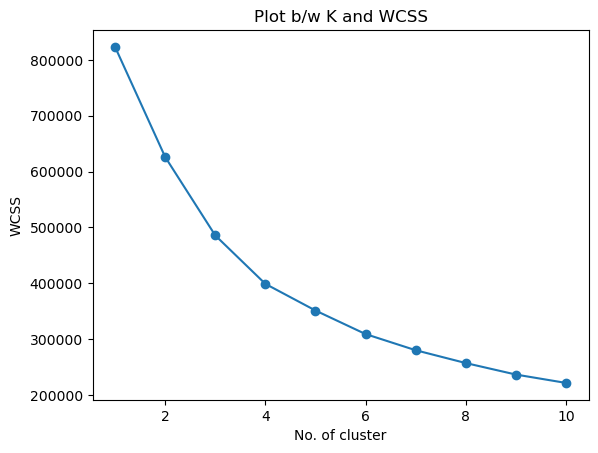

In [63]:
plt.plot(np.arange(1,11),wcss,marker='o')
plt.xlabel('No. of cluster')
plt.ylabel('WCSS')
plt.title('Plot b/w K and WCSS')
plt.show()

### After 5 clusters we have significant drop in WCSS , so 4 is optimal no. of clusters

#### Refitting the model with 5 clusters

In [64]:
model = KMeans(n_clusters=4)
model.fit(df)

KMeans(n_clusters=4)

In [65]:
df['KMeans_labels'] = model.labels_
df.head(15)

,Years_of_Experience,ctc_in_lakhs,company_hash_encoded,job_position_encoded,KMeans_labels
0,-0.099943,-0.146054,-1.659796,-0.079544,2
1,-0.982867,-0.845635,0.008629,-0.549487,2
2,0.194365,0.822596,-0.366500,-0.979796,0
3,-0.688559,-0.576565,-0.669235,-0.979796,2
4,-0.688559,0.176829,0.052741,-0.549487,1
5,-0.688559,-0.576565,1.417452,-0.549487,1
6,-0.982867,0.284457,-0.842214,-0.549487,2
7,-1.277175,-0.899448,0.847199,-0.979796,1
8,-1.277175,-0.845635,0.513336,1.502974,3
9,-1.277175,-0.942500,1.200361,1.502974,3


#### Count of data points belonging to these 5 clusters

In [66]:
df['KMeans_labels'].value_counts()

2    57101
1    55658
3    53592
0    39459
Name: KMeans_labels, dtype: int64

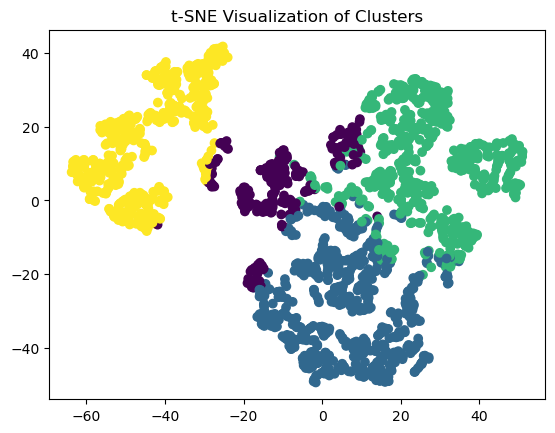

In [67]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(df.iloc[:2000,:].drop('KMeans_labels', axis=1))


plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['KMeans_labels'][:2000], cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.show()

## Hierarchical Clustering

#### Doing Hierarchical clustering on small sample of dataset because time complexity of Hierarchical clustering is O(n * n * n), it can be time consuming for a large dataset with over 200k data-points


In [68]:
df_hier=df.iloc[:50,:4]
df_hier

,Years_of_Experience,ctc_in_lakhs,company_hash_encoded,job_position_encoded
0,-0.099943,-0.146054,-1.659796,-0.079544
1,-0.982867,-0.845635,0.008629,-0.549487
2,0.194365,0.822596,-0.366500,-0.979796
3,-0.688559,-0.576565,-0.669235,-0.979796
4,-0.688559,0.176829,0.052741,-0.549487
5,-0.688559,-0.576565,1.417452,-0.549487
6,-0.982867,0.284457,-0.842214,-0.549487
7,-1.277175,-0.899448,0.847199,-0.979796
8,-1.277175,-0.845635,0.513336,1.502974
9,-1.277175,-0.942500,1.200361,1.502974


In [69]:
import scipy.cluster.hierarchy as sch
Z = sch.linkage(df_hier,metric='euclidean',method='ward')

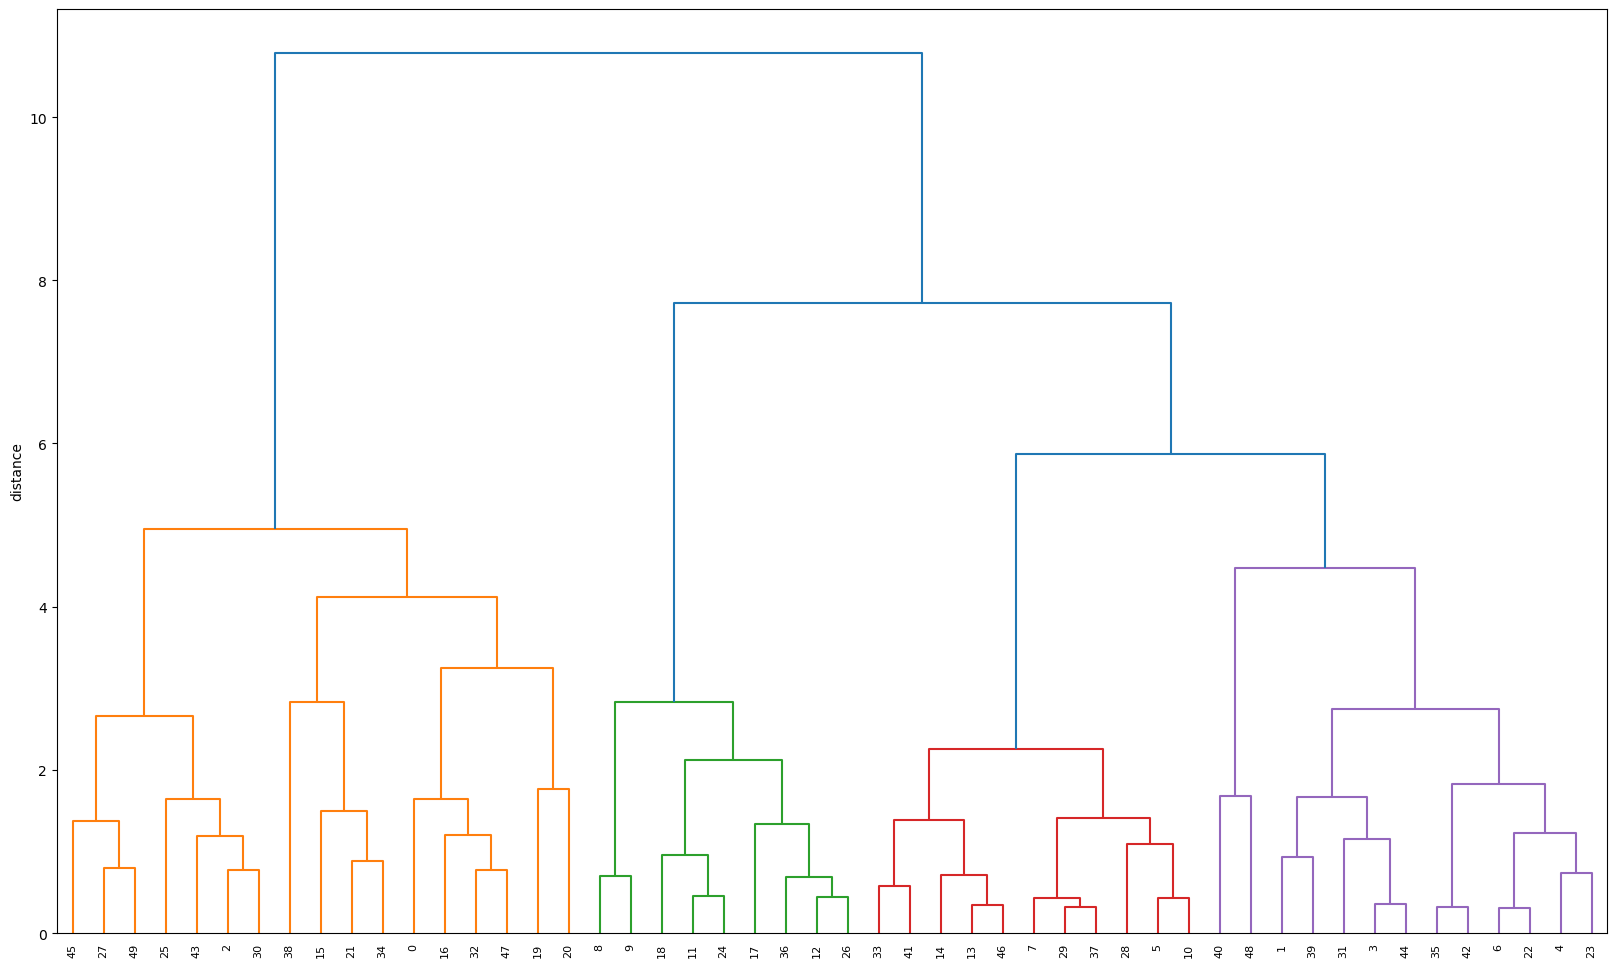

In [70]:
fig,ax = plt.subplots(figsize=(20,12))
sch.dendrogram(Z,labels=df_hier.index,ax=ax,color_threshold=5)
plt.xticks(rotation=90)
ax.set_ylabel('distance')
plt.show()

### Agglomerative Clustering

In [71]:
df_agglo = df.iloc[:2000,:4]
df_agglo

,Years_of_Experience,ctc_in_lakhs,company_hash_encoded,job_position_encoded
0,-0.099943,-0.146054,-1.659796,-0.079544
1,-0.982867,-0.845635,0.008629,-0.549487
2,0.194365,0.822596,-0.366500,-0.979796
3,-0.688559,-0.576565,-0.669235,-0.979796
4,-0.688559,0.176829,0.052741,-0.549487
...,...,...,...,...
1995,0.194365,0.069201,0.198861,1.502974
1996,-0.688559,-0.684193,1.560371,-0.787289
1997,-1.277175,-0.942500,1.264216,1.502974
1998,-0.099943,-0.016901,-0.542503,-0.079544


In [72]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
df_agglo['Agglomerative_Clustering_labels'] = ac.fit_predict(df_agglo)

In [73]:
df_agglo

,Years_of_Experience,ctc_in_lakhs,company_hash_encoded,job_position_encoded,Agglomerative_Clustering_labels
0,-0.099943,-0.146054,-1.659796,-0.079544,3
1,-0.982867,-0.845635,0.008629,-0.549487,3
2,0.194365,0.822596,-0.366500,-0.979796,2
3,-0.688559,-0.576565,-0.669235,-0.979796,3
4,-0.688559,0.176829,0.052741,-0.549487,1
...,...,...,...,...,...
1995,0.194365,0.069201,0.198861,1.502974,0
1996,-0.688559,-0.684193,1.560371,-0.787289,1
1997,-1.277175,-0.942500,1.264216,1.502974,0
1998,-0.099943,-0.016901,-0.542503,-0.079544,3


In [74]:
df_agglo['Agglomerative_Clustering_labels'].value_counts()

1    686
3    571
0    480
2    263
Name: Agglomerative_Clustering_labels, dtype: int64

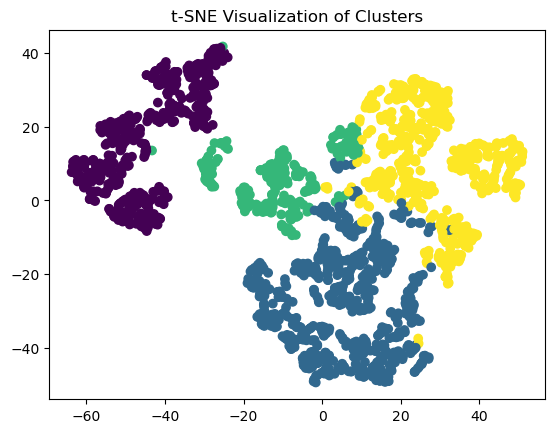

In [75]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(df_agglo.drop('Agglomerative_Clustering_labels', axis=1))


plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_agglo['Agglomerative_Clustering_labels'], cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.show()

## Business Insights

#### 1. Range of experience ranges form 0 to 12 years and median years of experience is around 4 years.
#### 2. Range of ctc in lakhs ranges from 0 to 35 and median salary is around 10 lakhs.
#### 3. Backend Engineer and Fullstack engineer are the two most in-demand jobs.
#### 4. Nvnv Wgzohrnvzwj Otqcxwto and Xzegojo are two companies which hired the most.
#### 5. Core Engineer Software developer and Applications Engineer 2 are two most high paying jobs.
#### 6. Average ctc generally increases with increase in years of experience.
#### 7. There are employees working for companies ranked according to Tier1 and Tier3.
#### 8. Employees earning more than their peers, equal to their peers and less than their peers are classified in Class1, Class2 and Class3.
#### 9. According to Elbow method, the optimal no. of clusters are 4.

## Business Recommendations

### 1.Recruitment and Talent Development:

#### Focus on hiring Backend Engineers and Fullstack Engineers, as they are the most in-demand roles.
#### Consider offering competitive salaries to attract and retain top talent, especially in Core Engineer Software Developer and Applications Engineer 2 roles which are identified as high-paying positions.
### 2.Company Engagement and Branding:

#### Companies like Nvnv Wgzohrnvzwj Otqcxwto and Xzegojo are hiring the most. Consider partnering with these companies for networking opportunities, joint ventures, or collaborative projects to enhance your brand visibility.
### 3.Employee Retention and Career Development:

#### Since the median years of experience is around 4 years, it's crucial to invest in employee retention strategies such as career development programs, skill enhancement, and mentorship programs to keep the experienced workforce engaged.
### 4.Compensation Strategy:

#### Adjust your compensation strategy to align with the industry standards. Ensure that your average salary range is competitive, especially for employees with 4 years of experience, as this is the median experience level.
### 5.Market Positioning:

#### Classify employees into Class1, Class2, and Class3 based on their earnings compared to their peers. Use this information to tailor benefits and incentives, ensuring that employees feel adequately rewarded for their contributions.
### 6.Cluster Analysis:

#### Utilize the optimal number of clusters (4, as per the Elbow method) for better segmentation of employees or customers. This can help in targeted marketing, personalized services, and more effective decision-making.
### 7.Tiered Company Approach:

#### Recognize the distinction between Tier1 and Tier3 companies. Tailor your business strategies accordingly, considering the specific needs and expectations of employees working for companies in different tiers.
### 8.Continuous Monitoring and Adaptation:

#### Regularly monitor industry trends, salary benchmarks, and job demand. Adapt your strategies based on changing market conditions to stay competitive in attracting and retaining talent.
### 9.Employee Satisfaction Surveys:

#### Conduct employee satisfaction surveys to understand the factors that contribute to employees earning more or less than their peers. Use this feedback to refine policies and improve overall workplace satisfaction.